In [1]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape) #check for same number of rows

Image Data Shape (1797, 64)
Label Data Shape (1797,)


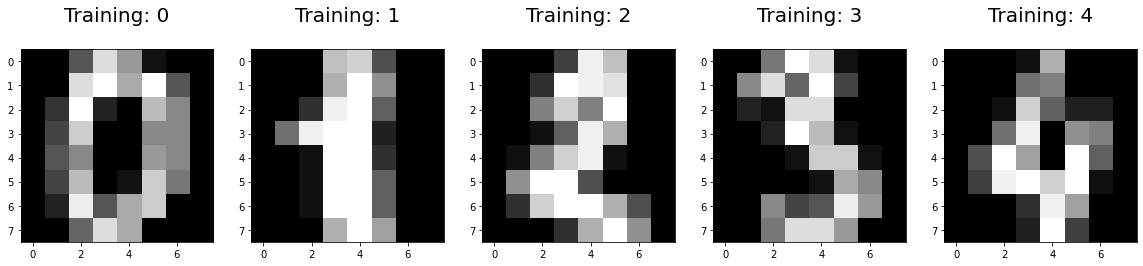

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1) #1 row by 5 columns
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [16]:
X = digits.data
y = digits.target

r = 4

print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.25, random_state=r)

In [18]:
X_test, X_dev, y_test, y_dev = train_test_split(X, 
                y, test_size=0.50, random_state=r) #dev set takes 0.25/0.50 of the data

Model is trained on train data, evaluated and tuned with the development set. This gives a final model evaluted on the test set

In [19]:
y_train = y_train.reshape(-1,1) #convert into 2D array

In [29]:
from sklearn.ensemble import RandomForestClassifier

scores_against_Train_set = []
scores_against_Dev_set = []
max_Depths_tested = []
r = 4

for max_depth in range(2,11):

    demo = RandomForestClassifier(max_depth=max_depth, random_state=r)
    demo.fit(X_train, y_train)
    score_against_Train_set = demo.score(X_train, y_train)
    score_against_Dev_set = demo.score(X_dev, y_dev)

    scores_against_Train_set.append(score_against_Train_set)
    scores_against_Dev_set.append(score_against_Dev_set)
    max_Depths_tested.append(max_depth)

C:\Users\chris\AppData\Local\Temp\ipykernel_3420\1259284363.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  demo.fit(X_train, y_train)
C:\Users\chris\AppData\Local\Temp\ipykernel_3420\1259284363.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  demo.fit(X_train, y_train)
C:\Users\chris\AppData\Local\Temp\ipykernel_3420\1259284363.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  demo.fit(X_train, y_train)
C:\Users\chris\AppData\Local\Temp\ipykernel_3420\1259284363.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  demo.fit(X_train, y_tra

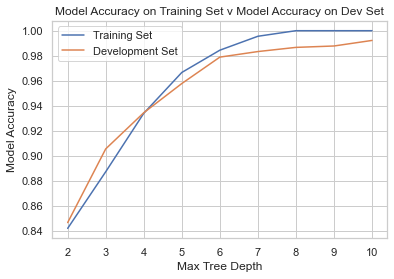

In [30]:
import seaborn as sns

# Plot the results against each other
sns.set(style="whitegrid")
fig, ax = plt.subplots()
plt.plot(max_Depths_tested, scores_against_Train_set, label='Training Set')
plt.plot(max_Depths_tested, scores_against_Dev_set, label='Development Set')
plt.title('Model Accuracy on Training Set v Model Accuracy on Dev Set')
plt.xlabel('Max Tree Depth')
plt.ylabel('Model Accuracy')
ax.legend()

Overfitting when max_depth > 4 and underfitting when < 4

In [31]:
# train the final Random Forest model, and fit it to the Training data
clf = RandomForestClassifier(max_depth=4, random_state=r)
clf.fit(X_train, y_train)

# make predictions on the Test data
y_pred = clf.predict(X_test).reshape(-1,1)

C:\Users\chris\AppData\Local\Temp\ipykernel_3420\3722679354.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


In [34]:
# Display a confusion matrix for the model on the Test set
from sklearn.metrics import confusion_matrix
import pandas as pd

classes = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
conf_matrix = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(conf_matrix, columns=classes, index=classes)
cm_df

,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine
Zero,86,0,0,0,1,0,0,0,0,0
One,0,94,0,1,0,0,0,0,0,3
Two,1,1,88,0,0,0,0,0,0,0
Three,1,1,0,78,0,0,0,3,3,0
Four,0,0,0,0,87,0,0,4,0,0
Five,0,0,0,1,0,82,0,1,0,6
Six,0,1,0,0,2,0,85,0,0,0
Seven,0,0,0,0,1,0,0,86,0,0
Eight,0,5,2,3,1,0,1,3,75,2
Nine,0,0,0,5,0,3,0,6,0,75


True i.e test (rows), predicted (columns)

Text(77.97312500000001, 0.5, 'True label')

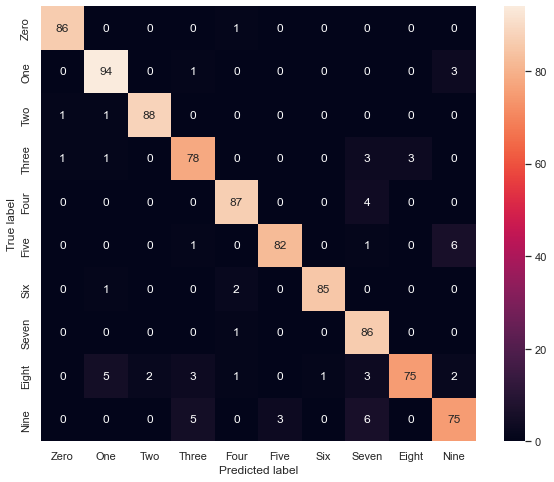

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

Class 8 struggles the most

In [40]:
from sklearn.metrics import f1_score, precision_score, recall_score

prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
F1 = 2 * (prec * rec) / (prec + rec)

print("Accuracy:\t", clf.score(X_test, y_test))
print('Precision:\t', prec)
print('Recall:\t\t', rec)
print('F1 score:\t', F1)

Accuracy:	 0.9309576837416481
Precision:	 0.9333373509403443
Recall:		 0.9309576837416481
F1 score:	 0.9321459985856836
